# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2021/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday October the 31st, 2021 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via http://peergrade.io/


(If you haven't set up an account on peergrade yet, go to www.peergrade.io/join and type in the class code: ***DPZEV6***.)

### Overview

This year's Assignment 2 is all about analyzing the network of rappers.

Note that this time I'm doing the exercises slightly differently in order to clean things up a bit. The issue is that the weekly lectures/exercises include quite a few instructions and intermediate results that are not quite something you guys can meaningfully answer. 

Therefore, in the assignment below, I have tried to reformulate the questions from the weekly exercises into something that is (hopefully) easier to answer. *Then I also note which lectures each question comes from*; that way, you can easily go back and find additional tips & tricks on how to solve things 😇


----

In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import networkx as nx
from wordcloud import WordCloud
import string
import powerlaw
from nltk import FreqDist
import json
import os
import requests
from urllib.parse import quote_plus

from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# Part 0: Building the network 

To create our network, we downloaded the rapper Wiki pages from each coast (during Week 4) and linked them via the hyperlinks connecting pages to each other. To achieve this goal we have used regular expressions.

> * Explain the strategy you have used to extract the hyperlinks from the Wiki-pages, assuming that you have already collected the rapper pages with the Wikipedia API.
> * Show the regular expressions you have built and explain in details how they work.

To extract the Wiki links from the rapper pages loop over the wiki page of each rapper. Here the page of the current rapper is denoted ``` text ``` . In this we know to look for the pattern ```[[link]]``` or ```[[link | alias]]```. Therefore we have used a regular expression in the following way: 

```python
pattern = r"\[\[(.+?)\]\]"
links = re.findall(pattern, text)
```

Here the ``findall`` function ensures that all instances of matches are found. The pattern is defined as follows:

* ``\[\[`` : The pattern starts with two square brackets
* ```(.+?)``` : The pattern group (denoted with ``()``) continues with any character (```.```) between one and unlimited times (```+```). Finally the question mark ensures that the pattern is "lazy".
* ```\]\]``` : The pattern ends with two square brackets

Finally we add the following line to remove the alias from the links:
    
```python
links = [link.split('|')[0] for link in links]
```
Hereby a list of links is created for this rapper.

# Part 1: Network visualization and basic stats

Visualize your network of rappers (from lecture 5) and calculate stats (from lecture 4 and 5). For this exercise, we assume that you have already generated the network and extracted the largest weakly connected component (the "largest weakly connected component" of a directed network is the subgraph consisting of the nodes that would constitute the largest connected component if the network were undirected) . The visualization and statistics should be done for the largest weakly connected component only.

### Extract network

In [2]:
# load the graph
G = nx.read_gexf('data/rapper_network.gexf')

# extract largest weakly connected component
largest_cc = max(nx.weakly_connected_components(G), key=len)
# create a subgraph of the largest connected component
g = G.subgraph(largest_cc)

_Exercise 1a_: Stats (see lecture 4 and 5 for more hints)

> * What is the number of nodes in the network? 
> * What is the number of links?
> * Who is the top connected rapper? (Report results for the in-degrees and out-degrees). Comment on your findings. Is this what you would have expected?
> * Who are the top 5 most connected east-coast rappers (again in terms of in/out-degree)? 
> * Who are the top 5 most connected west-coast rappers (again in terms of in/out-degree)?
> * Plot the in- and out-degree distributions for the whole network. 
>   * Use axes that make sense for visualizing this particular distribution.
>   * What do you observe? 
>   * Give a pedagogical explaination of why the in-degree distribution is different from the out-degree distribution?
> * Find the exponent (by using the `powerlaw` package) for the in- and out-degree distributions. What does it say about our network?
> * Compare the two degree distributions two the degree distribution of a *random network* (undirected) with the same number of nodes and probability of connection *p*. Comment your results.



### Number of nodes and links

In [3]:
# print the number of nodes and edges
print("Number of nodes: ", g.number_of_nodes())
print("Number of links: ", g.number_of_edges())

# There should be 728 and 5809

Number of nodes:  728
Number of links:  5824


### Top connected rapper

In [4]:
# find most connected rapper
in_degree_dict = dict(g.in_degree(g.nodes()))
out_degree_dict = dict(g.out_degree(g.nodes()))
degree_dict = dict(g.degree(g.nodes()))

# sort the dictionary by degree
print("Highest in-degree:", max(in_degree_dict, key=in_degree_dict.get), ",", in_degree_dict[max(in_degree_dict, key=in_degree_dict.get)])
print("Highest out-degree:", max(out_degree_dict, key=out_degree_dict.get), ",", out_degree_dict[max(out_degree_dict, key=out_degree_dict.get)])

Highest in-degree: Snoop Dogg , 125
Highest out-degree: Drag-On , 52


The rapper with the highest in-degree is Snoop Dog. Hence he is the most referenced by other rappers wikitexts. Since snoop Dog is a well known rapper with a large discography we can expect a large number of references to him. Also based on his Wikipedia text he appears very influential in rap. On the other hand Drag-On has the most references to other rappers. 

### Top connected east and west coast rappers

In [5]:
# find most connected rappers from east and west coast
central_nodes_in = sorted(g.in_degree, key=lambda x: x[1], reverse=True)
central_nodes_out = sorted(g.out_degree, key=lambda x: x[1], reverse=True)

central_nodes_in_east = []
central_nodes_in_west = []
central_nodes_out_east = []
central_nodes_out_west = []

for node in central_nodes_in:
    if g.nodes[node[0]]['Coast'] == 'East':
        central_nodes_in_east.append(node)
    else:
        central_nodes_in_west.append(node)

for node in central_nodes_out:
    if g.nodes[node[0]]['Coast'] == 'East':
        central_nodes_out_east.append(node)
    else:
        central_nodes_out_west.append(node)

In [6]:
# Most connected east coast rappers
print("Top 5 highest in-degree east coast rappers:")
for i in range(5):
    print(str(i+1)+ ")"+str(central_nodes_in_east[i])[1:-2])

print("\n")
print("Top 5 highest out-degree east coast rappers:")
for i in range(5):
    print(str(i+1)+ ")"+str(central_nodes_out_east[i])[1:-2])


Top 5 highest in-degree east coast rappers:
1)'Jay-Z', 11
2)'Nas', 9
3)'50 Cent', 9
4)'Busta Rhymes', 8
5)'The Notorious B.I.G.', 6


Top 5 highest out-degree east coast rappers:
1)'Drag-On', 5
2)'Black Thought', 4
3)'Jahlil Beats', 3
4)'MC Lyte', 3
5)'Uncle Murda', 3


In [7]:
# Most connected west coast rappers
print("Top 5 highest in-degree west coast rappers:" + "\n" + str(central_nodes_in_west[:5]))
print("Top 5 highest out-degree west coast rappers:" + "\n" + str(central_nodes_out_west[:5]))

Top 5 highest in-degree west coast rappers:
[('Snoop Dogg', 125), ('Dr. Dre', 81), ('Kendrick Lamar', 75), ('Tupac Shakur', 70), ('E-40', 63)]
Top 5 highest out-degree west coast rappers:
[('DJ Dahi', 38), ('Kendrick Lamar', 37), ('Dr. Dre', 36), ('The Game (rapper)', 36), ('Kurupt', 35)]


### Plot of distributions

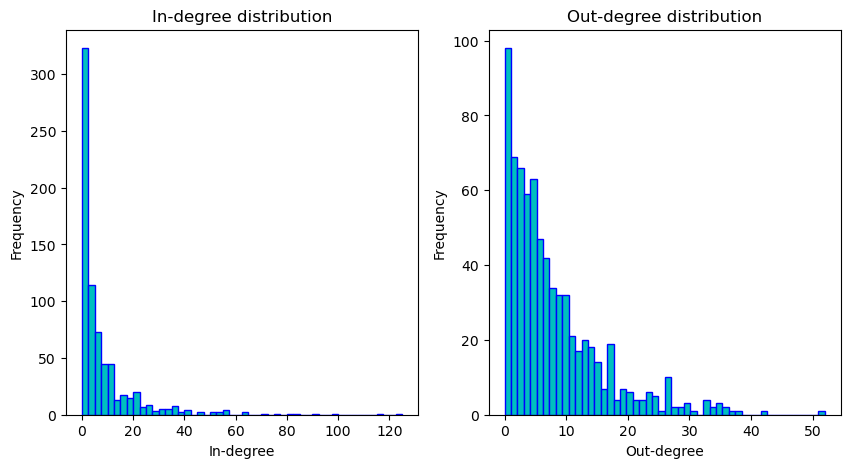

In [8]:
# plot distribution of in- and out-degrees
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(in_degree_dict.values(),bins = 50, color='c',edgecolor = 'blue')
plt.title("In-degree distribution")
plt.xlabel("In-degree")
plt.ylabel("Frequency")
plt.subplot(1, 2, 2)
plt.hist(out_degree_dict.values(), bins = 50, color='c', edgecolor='blue')
plt.title("Out-degree distribution")
plt.xlabel("Out-degree")
plt.ylabel("Frequency")
plt.show()

In the figure we can observe that the in-degree distribution is different from the out-degree distribution. It is noticiable that the in-degree reaches much higher values than the out-degree. Furthermore the in-degree distribution is more skewed than the out-degree distribution with a higher frequence for low in-degree values. Logically the in-degree distribution is more skewed than the out-degree distribution since less rappers are referenced by many other rappers than the other way around. Most rappers in the network are less known and therefore referenced by less other rappers. On the other hand the most famous rappers are referenced by many other rappers. Also the less known rappers most likely have shorter carees and discografies hence less references to other rappers.

### Exponent of distributions

In [9]:
a_in = powerlaw.Fit(list(in_degree_dict.values())).alpha
a_out = powerlaw.Fit(list(out_degree_dict.values())).alpha

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


In [10]:
print("alpha- in degree:", f'{a_in:.3f}')
print("alpha- out degree:", f'{a_out:.3f}')

alpha- in degree: 2.748
alpha- out degree: 12.016


Using the powerlaw package we find that the exponent of the in-degree distribution is 2.7 and the exponent of the out-degree distribution is 12.0. Hence both networks are networks with powerlaw distributions. 

### Comparison to a random network

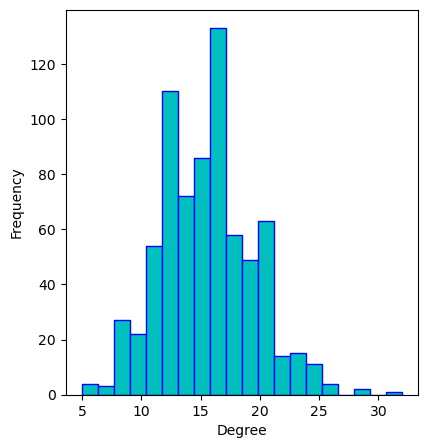

In [11]:
# create random graph with same number of nodes and p
p = (g.number_of_edges()*2) / (g.number_of_nodes() * (g.number_of_nodes() - 1))
random_graph = nx.erdos_renyi_graph(g.number_of_nodes(), p)

# plot degree distribution of in and out degree
degrees = [random_graph.degree(n) for n in random_graph.nodes()]
# create subplots
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.hist(degrees, bins=20, color='c', edgecolor='blue')
plt.xlabel('Degree')
plt.ylabel('Frequency')


# plot in degree on loglog scale
#unique_degrees = np.unique(degrees)
#multiplicity_out = [degrees.count(i) for i in unique_degrees]

#plt.subplot(1,2,2)
#plt.plot(unique_degrees, multiplicity_out, 'o', color = 'blue')
#plt.xlabel('degree')
#plt.ylabel('Frequency')

#plt.suptitle('Degree distribution')
plt.show()


The random network follows a poisson distribution...

_Exercise 1b_: Visualization (see lecture 5 for more hints)

> * Create a nice visualization of the total (directed) network:
>   * Color nodes according to the role;
>   * Scale node-size according to degree;
>   * Get node positions based on either the Force Atlas 2 algorithm, or the built-in algorithms for networkX;
>   * Whatever else you feel like that would make the visualization nicer.
> * Describe the structure you observe. What useful information can you decipher from this?

The following code creates a visualization of the directed network with the notes being blue for west coast rappers and red for east coast rappers. Additionally the size of the notes differ depending on the degree of the node. This is done by defining the node size as the degree multiplied by 50. In this way the size of the node is dependent on the degree of the node. In order to clearly illustrate the relationship between the nodes, each edge has been given a specific color. The edge is red if an east coast node leads to another east coast node. The edge is blue if a west code node leads to a west code node. The edge is green if and an eaast coast node leads to a west cost node, or the other way around.

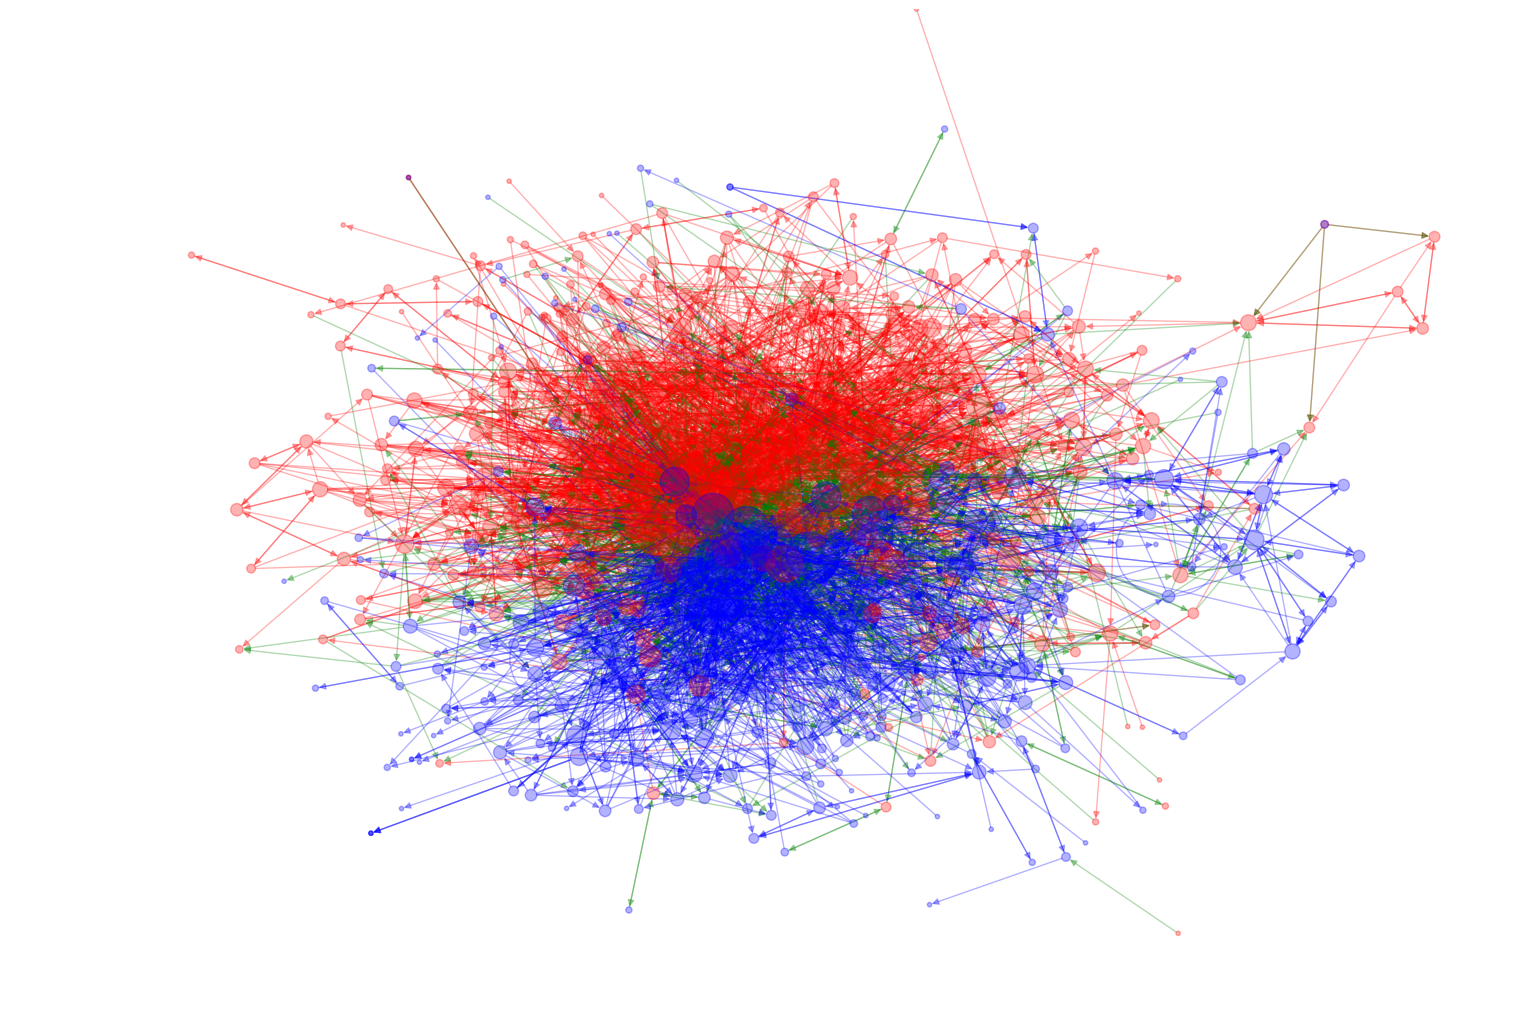

In [52]:
# Create a set of nodes from the east coast and west coast based on the CSV files for east coast rappers and west coast rappers
df_rappers = pd.read_csv("data/Rappers.csv")

east_coast_nodes = df_rappers[df_rappers["Coast"] == "East"]["WikipediaPageName"].tolist()
west_coast_nodes = df_rappers[df_rappers["Coast"] == "West"]["WikipediaPageName"].tolist()

# Set the 'coast' attribute for each node
for node in g.nodes():
    if node in east_coast_nodes:
        g.nodes[node]["coast"] = "EastCoast"
    elif node in west_coast_nodes:
        g.nodes[node]["coast"] = "WestCoast"
    


# Create a list of colors for node visualization based on the 'coast' attribute
node_colors = ["red" if g.nodes[node]["coast"] == "EastCoast" else "blue" for node in g.nodes()]


#Creates a list of node sizes depending on the node degree
node_sizes = [10 * g.degree[node] for node in g.nodes()]

#Sets colors based on the role of the edge
edge_colors = []
for u, v in g.edges():
    if g.nodes[u]["coast"] == "EastCoast" and g.nodes[v]["coast"] == "EastCoast":
        edge_colors.append("Red")
    elif g.nodes[u]["coast"] == "WestCoast" and g.nodes[v]["coast"] == "WestCoast":
        edge_colors.append("Blue")
    else:
        edge_colors.append("Green")

#Plot figure
plt.figure(figsize=(15, 10))

# Choose a layout algorithm
pos = nx.kamada_kawai_layout(g)

#Draw the graph
nx.draw(g, pos, node_color=node_colors, with_labels=False, node_size=node_sizes, edge_color=edge_colors, alpha=0.3)

#Set axis/zoom in or out
x_min, x_max = -1, 1
y_min, y_max = -1, 1
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

#show figure
plt.show()

Some usefull informtion we can extract from the plottet graph is that rappers with a smaller network, which is illustrated by them having a smaller node-size, is often connected to rappers with a larger network from the same coast. This observation my be an indication of preferential attachment. We can also see from the network that most often it is the most connected rappers who are connected to the other coast, which is made visible by all the green edges.

# Part 2: Word-clouds

Create your own version of the word-clouds (from lecture 7). For this exercise we assume you know how to download and clean text from rappers' Wikipedia pages.

Here's what you need to do:
> * Create a word-cloud for each coast according to the novel TF-TR method. Feel free to make it as fancy as you like. Explain your process and comment on your results.
> * For each coast, what are the 5 words with the highest TR scores? Comment on your result.

### Create east and west corpus and clean text
In the following section we create a corpus consisting of an east coast text and a west coast text. The texts consists of all the wikipedia pages for all the rappers in the respective coast. The text is cleaned by tokenizing, make all words lowercase, remove punctuation and remove stopwords.

In order to download the wikipedia texts for each of the rappers the following code is being used:

Load the dataframe using Pandas

In [13]:
df_rappers = pd.read_csv("data/Rappers.csv")

Define API parameters

In [14]:
# Define API parameters
api_url = 'https://en.wikipedia.org/w/api.php'
api_params = {
    'action': 'query',
    'prop': 'extracts',
    'exlimit': '1',
    'explaintext': '1',
    'format': 'json'
}

Create the corpus that all of the files will be downloaded to

In [15]:
corpus_dir = 'rapper_corpus'
os.makedirs(corpus_dir, exist_ok=True)

Create a seperate list of east coast rappers and west coast rappers using Pandas

In [16]:
east_coast_rappers = df_rappers[df_rappers['Coast'] == 'East']['WikipediaPageName'].tolist()
west_coast_rappers = df_rappers[df_rappers['Coast'] == 'West']['WikipediaPageName'].tolist()

Create a function that downloads the wikipedia pages to the corpus in txt files

In [17]:
def create_corpus(rapper_list, corpus_name):
    corpus = ""
    for rapper_name in rapper_list:
        api_params['titles'] = rapper_name
        encoded_rapper_name = quote_plus(rapper_name)

        response = requests.get(api_url, params=api_params)
        data = response.json()

        # Extract text from the JSON response
        page_data = data['query']['pages']
        page_id = list(page_data.keys())[0]
        rapper_text = page_data[page_id]['extract']

        # Append the text to the corpus
        corpus += rapper_text

    # Create a text file for the corpus
    with open(os.path.join(corpus_dir, f'{corpus_name}_corpus.txt'), 'w', encoding='utf-8') as file:
        file.write(corpus)

Create a seperate corpus for each of the coasts

In [18]:
#create_corpus(east_coast_rappers, 'east')
#create_corpus(west_coast_rappers, 'west')

The next code cleans-up the text by tokenizing the text, removing punktuations, making every letter lower case and removing stop words

In [19]:
def clean_text(text):
    tokens = word_tokenize(text)
    clean_tokens = []
    
    for token in tokens:
        # Convert to lowercase
        token = token.lower()
        
        # Remove punctuation
        if token not in string.punctuation:
            # Remove stopwords
            if token not in stopwords.words('english'):
                clean_tokens.append(token)

    return clean_tokens

### Create TF-TR list and plot WordCloud

The following code is a function that creates a TF list using the NLTK frequency distribution function to find the frequency of all the words in the cleaned up texts.

In [20]:
# Create a Term Frequency (TF) list
def create_tf_list(corpus_name):
    with open(os.path.join(corpus_dir, f'{corpus_name}_corpus.txt'), 'r', encoding='utf-8') as file:
        corpus_text = file.read()
        clean_tokens = clean_text(corpus_text)

        # Calculate the TF list
        tf_list = nltk.FreqDist(clean_tokens)

        return tf_list

This code actually creates the TF-lists for the east coast rappers and the west coast rappers

In [21]:
east_coast_tf_list = create_tf_list('east')
west_coast_tf_list = create_tf_list('west')

The next thing to be done is to create a function that calculates the ratio of each word in both of the lists, using the method explained for the TF-TR excersise in the week 7 notebook. The constant i chosen to be one. It is also in this function tht the lists get sorted in descending order, so the highest ratio in the first in the list and the lowest ratio is last.

In [22]:
c = 1 

def calculate_ratio(tf_list1, tf_list2, c):
    ratios = {}
    for word, freq1 in tf_list1.items():
        freq2 = tf_list2[word] 
        if word in tf_list2:
            ratio = freq1 / (freq2 + c)
            ratios[word] = ratio
        else:
            ratios[word] = 0

    sorted_ratios = sorted(ratios.items(), key=lambda item: item[1], reverse=True)
    return sorted_ratios        

The next piece of code generates the TF-TR ratio for all of the tokens in the east coast text and in the west coast text. The lists used in the calculate_ratio function must be switched when creating the west coast ratio list, in order to get the right ratio for them

In [23]:
sorted_east_coast_ratios = calculate_ratio(east_coast_tf_list, west_coast_tf_list, c)
sorted_west_coast_ratios = calculate_ratio(west_coast_tf_list, east_coast_tf_list, c)

Since the TF-TR lists for both east coaast rappers and west coast rappers have been generated and sorted, the word cloud can be constructed.

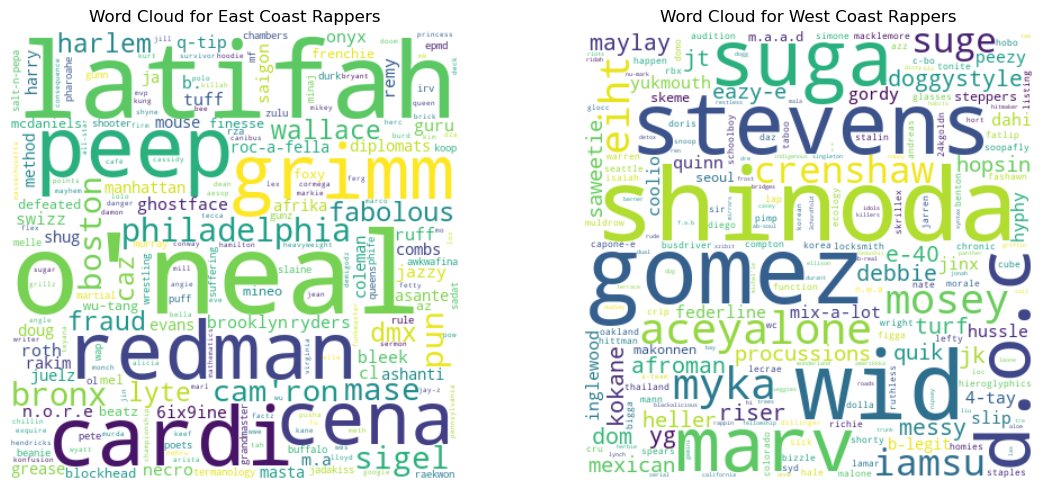

In [24]:
# Create word clouds and display them side by side
plt.figure(figsize=(12, 5))

# Word cloud for East Coast
plt.subplot(1, 2, 1)
wordcloud_east = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(sorted_east_coast_ratios))
plt.imshow(wordcloud_east, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for East Coast Rappers")

# Word cloud for West Coast
plt.subplot(1, 2, 2)
wordcloud_west = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(sorted_west_coast_ratios))
plt.imshow(wordcloud_west, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for West Coast Rappers")

plt.tight_layout()
plt.show()

The next part shows the five words for each coast, with the highest ratio.

In [25]:
print(sorted_west_coast_ratios[:5])
print(sorted_east_coast_ratios[:5])

[('shinoda', 47.0), ('wid', 41.0), ('gomez', 40.0), ('stevens', 33.0), ('suga', 27.0)]
[("o'neal", 76.0), ('latifah', 69.0), ('peep', 40.25), ('cardi', 39.25), ('redman', 37.0)]


# Part 3: Communities

Find communities and their modularity (from lecture 7).

Here's what you need to do:
> * In your own words, explain what the measure "modularity" is, and the intuition behind the formula you use to compute it. 
> * Find communities in the network, and explain how you chose to identify the communities: Which algorithm did you use and how does it work?
> * Comment on your results:
>   * How many communities did you find in total?
>   * Compute the value of modularity with the partition created by the algorithm.
>   * Plot and/or print the distribution of community sizes (whichever makes most sense). Comment on your result.
> * Now, partition your rappers into two communities based on which coast they represent.
>   * What is the modularity of this partition? Comment on the result.

# Part 4: Sentiment of communities

Analyze the sentiment of communities (lecture 8). More tips & tricks can be found, if you take a look at Lecture 8's exercises.

A couple of additional instructions you will need below:
* Average the average sentiment of the nodes in each community to find a community-level sentiment.

Here's what you need to do (use the LabMT wordlist approach):
> * Calculate and store sentiment for every rapper
> * Create a histogram of all rappers' associated sentiments.
> * What are the 10 rappers with happiest and saddest pages?

Now, compute the sentiment of each coast: 
> * Which is the happiest and which is saddest coast according to the LabMT wordlist approach? (Take the coast's sentiment to be the average sentiment of the coast's rappers' pages (disregarding any rappers with sentiment 0).
> * Use the "label shuffling test" (Week 5 and 8) to test if the coast with the highest wikipedia page sentiment has a page sentiment that is significantly higher (5% confidence bound) than a randomly selected group of rappers of the same size.
> * Does the result make sense to you? Elaborate.

**Congratulations for making it to the end of the Assignment. Good luck with your independent project**



In [26]:
# load txt
labmt = pd.read_csv("data/LabMT.txt", sep='\t')

# load rappers
rappers = pd.read_csv("data/Rappers.csv", sep=',')
rappers_names = list(rappers['WikipediaPageName'])


In [27]:
def sentiment_score(text):
    text = word_tokenize(text)
    text = [word.lower() for word in text if word.isalpha()]

    total = 0
    sent = 0
    fdist = FreqDist(text)
    for word in fdist:
        if word in list(labmt['word']):
            sent += labmt['happiness_average'].loc[labmt['word'] == word].values[0] * fdist[word]
            total += fdist[word]

    sent /= total

    return sent

In [28]:
print(sentiment_score("I am happy"))

6.533333333333334


In [29]:
test_dict = dict()

test_dict['test'] = 1

In [30]:
def sentiment_rappers(rappers):
    rappers_happiness = {}
    for rapper in rappers:
        with open("data/rappers_text/"+rapper+'.txt') as f:
            try:
                rapper_text = f.readlines()[0]
            except:
                continue

        rappers_happiness[rapper] = sentiment_score(rapper_text)

    return rappers_happiness

rappers_happiness = sentiment_rappers(rappers_names)

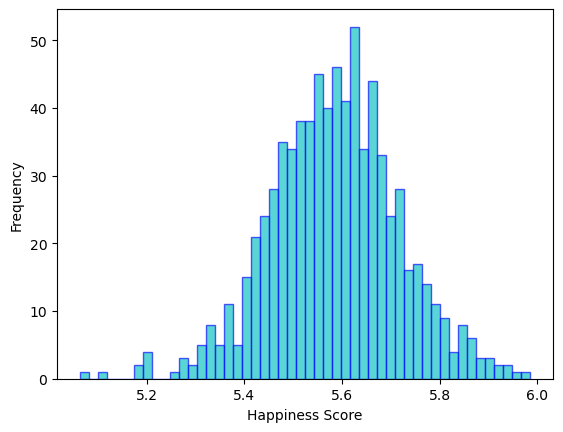

In [31]:
plt.hist(list(rappers_happiness.values()), bins=50, color='c', edgecolor='blue', alpha=0.65)
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

In [32]:
sorted_rappers_happiness = dict(sorted(rappers_happiness.items(), key=lambda x:x[1], reverse=True))

In [33]:
print("Top 10 most happy rappers is: ")
for i in range(10):
    print(i+1, ")",list(sorted_rappers_happiness.keys())[i],"(", f'{list(sorted_rappers_happiness.values())[i]:.3f}', ")")

print("\n")
print("Top 10 least happy rappers is: ")
for i in range(10):
    print(i+1, ")",list(sorted_rappers_happiness.keys())[-i-1],"(", f'{list(sorted_rappers_happiness.values())[-i-1]:.3f}',")")

Top 10 most happy rappers is: 
1 ) Dave Free ( 5.986 )
2 ) Rashad Smith (producer) ( 5.960 )
3 ) Chanel West Coast ( 5.942 )
4 ) Queen Latifah ( 5.935 )
5 ) Cory Gunz ( 5.926 )
6 ) Awkwafina ( 5.922 )
7 ) Xzibit ( 5.909 )
8 ) DJ Skee ( 5.905 )
9 ) Redfoo ( 5.896 )
10 ) DJ Disco Wiz ( 5.885 )


Top 10 least happy rappers is: 
1 ) Cool C ( 5.062 )
2 ) 6ix9ine ( 5.103 )
3 ) Daz Dillinger ( 5.179 )
4 ) Hussein Fatal ( 5.190 )
5 ) YGD Tha Top Dogg ( 5.194 )
6 ) Fred the Godson ( 5.195 )
7 ) Rob Stone (rapper) ( 5.203 )
8 ) Chinx ( 5.206 )
9 ) Sheff G ( 5.255 )
10 ) Conceit (rapper) ( 5.270 )


In [34]:
EastHappiness = [rappers_happiness[name] for name in rappers[rappers['Coast'] == 'East']['WikipediaPageName'].tolist() if name in rappers_happiness.keys()]
WestHappiness = [rappers_happiness[name] for name in rappers[rappers['Coast'] == 'West']['WikipediaPageName'].tolist() if name in rappers_happiness.keys()]

avg_east = np.mean(EastHappiness)
avg_west = np.mean(WestHappiness)

print("The mean happiness score for east coast rappers is: ", f'{avg_east:.3f}')
print("The mean happiness score for west coast rappers is: ", f'{avg_west:.3f}')

The mean happiness score for east coast rappers is:  5.589
The mean happiness score for west coast rappers is:  5.579


In [35]:
coast = rappers['Coast'].tolist()
# random shuffle

count2 = 0
n = 1000
for i in range(n):
    np.random.shuffle(coast)
    rappers['Coast_r'] = coast
    
    EastNames_r = [name for name in rappers[rappers['Coast_r'] == 'East']['WikipediaPageName'].tolist() if name in rappers_happiness.keys()]
    EastHappiness_r = [rappers_happiness[name] for name in EastNames_r]

    avg_east_r = np.mean(EastHappiness_r)

    if avg_east > avg_east_r:
        count2 += 1

print("The percentage is: ", count2/n*100, "%")

The percentage is:  84.3 %
